In [16]:
import pandas as pd

df = pd.read_csv('data/light_spotify_dataset.csv')
df.head()

,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
0,ABBA,She's My Kind Of Girl,joy,0.447619,pop,2014,F Maj,128,-6.00,No,31,78,56,60,3,31,7,0
1,ABBA,"Andante, Andante",love,0.202222,pop,1980,A# Maj,102,-10.72,No,59,36,52,38,2,7,68,0
2,ABBA,As Good As New,sadness,0.300881,pop,1979,E Maj,139,-5.70,No,50,78,85,97,3,8,20,2
3,ABBA,Bang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0
4,ABBA,Bang-A-Boomerang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0


In [17]:
# Convert columns
# Drop high-cardinality columns after checking df.nunique()
df = df.drop(columns=['artist', 'song'])  # already removed

# Map 'Explicit'
df['Explicit'] = df['Explicit'].map({'Yes': 1, 'No': 0})

# Convert release date to numeric
df['Release Date'] = pd.to_numeric(df['Release Date'], errors='coerce')

# Only one-hot encode 'emotion' and 'Genre' if their cardinality is low
df_encoded = pd.get_dummies(df, columns=['emotion', 'Genre'])

df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values (if any)
df = df.dropna()

In [18]:
# Get correlation of all columns with Popularity
pop_corr = df.corr()['Popularity'].sort_values(ascending=False)

# Display
print(pop_corr)
# Confirm dimensions
print(f"Data shape after encoding: {df_encoded.shape}")

emotion            NaN
variance           NaN
Genre              NaN
Release Date       NaN
Key                NaN
Tempo              NaN
Loudness           NaN
Explicit           NaN
Popularity         NaN
Energy             NaN
Danceability       NaN
Positiveness       NaN
Speechiness        NaN
Liveness           NaN
Acousticness       NaN
Instrumentalness   NaN
Name: Popularity, dtype: float64
Data shape after encoding: (236988, 2586)


C:\Users\Home\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Home\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


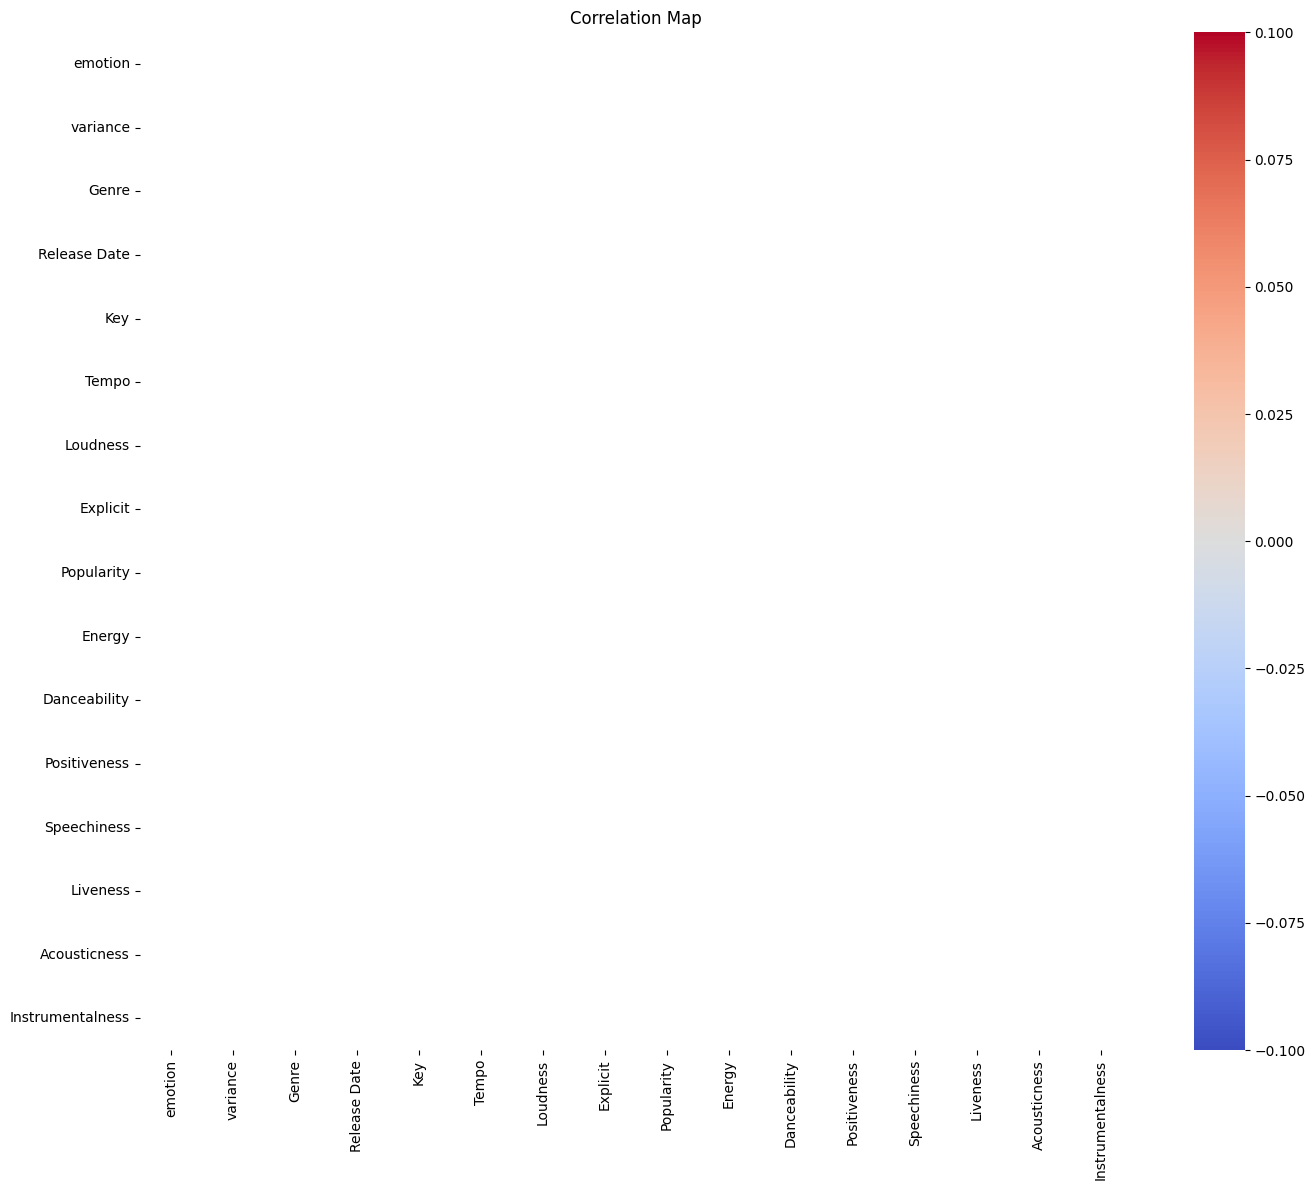

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Map")
plt.tight_layout()
plt.show()